In [291]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn import metrics

In [2]:
features = pd.read_csv('features.csv')
sales = pd.read_csv('sales.csv')
stores = pd.read_csv('stores.csv')

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
df = features.merge(sales, on=['Store', 'Date'])
df['IsHoliday_x'].equals(df['IsHoliday_y'])

True

In [7]:
df = df.drop('IsHoliday_y', axis=1)
df = df.rename(columns={'IsHoliday_x': 'IsHoliday'})
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


In [8]:
df = df.merge(stores, on='Store')
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


In [9]:
df.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
dtype: int64

In [10]:
df['MarkDown1'] = df['MarkDown1'].fillna(0)
df['MarkDown2'] = df['MarkDown2'].fillna(0)
df['MarkDown3'] = df['MarkDown3'].fillna(0)
df['MarkDown4'] = df['MarkDown4'].fillna(0)
df['MarkDown5'] = df['MarkDown5'].fillna(0)
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [11]:
df.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Dept              int64
Weekly_Sales    float64
Type             object
Size              int64
dtype: object

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Dept                     int64
Weekly_Sales           float64
Type                    object
Size                     int64
dtype: object

In [13]:
features['Date'] = pd.to_datetime(features['Date'], format='%d/%m/%Y')
features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [14]:
sales['Date'] = pd.to_datetime(sales['Date'], format='%d/%m/%Y')
sales.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [15]:
filtered_df = df.loc[(df['Date'] < '2012-12-10')]
filtered_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [16]:
filtered_df['Type'] = filtered_df['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))
filtered_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,1,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,1,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,1,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,1,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,1,151315


# Analytical phase

<AxesSubplot:>

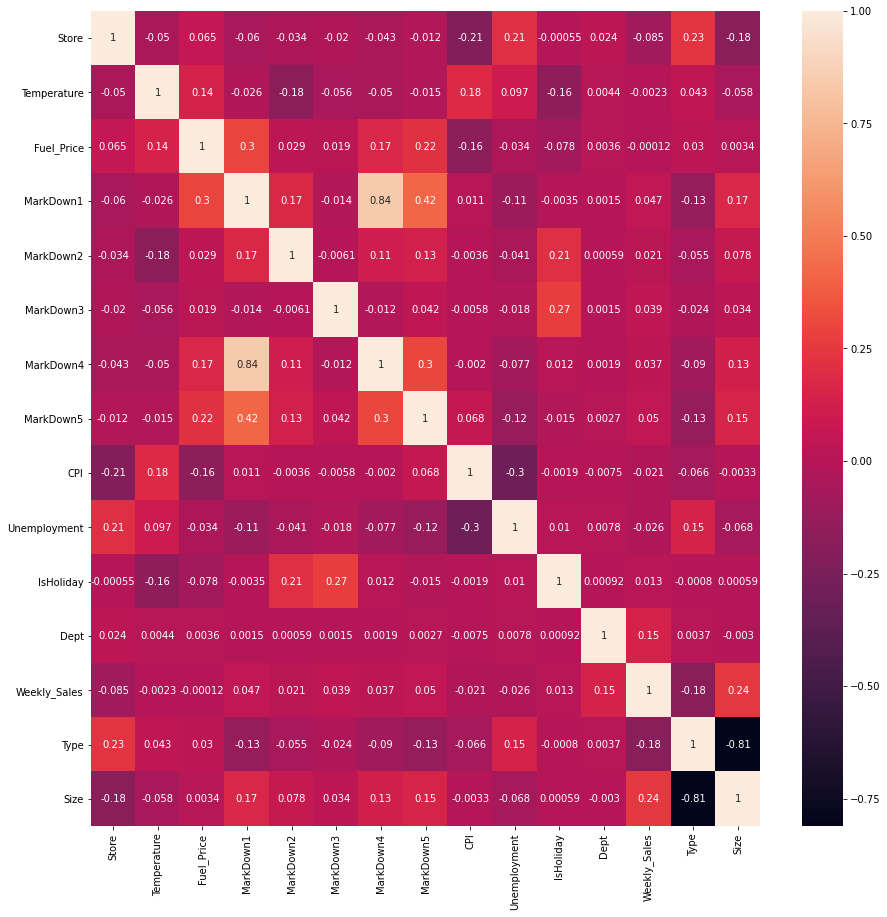

In [17]:
plt.subplots(figsize=(15,15))
sns.heatmap(filtered_df.corr(), annot=True)

Correlation matrix shows that Weekly Sales mostly depends on Size, Type and Dept, but these dependencies are still weak.

In [18]:
filtered_df['Week'] = filtered_df['Date'].dt.isocalendar().week
filtered_df['Week'] = filtered_df['Week'].astype('int64')
filtered_df['Week']

0          5
1          5
2          5
3          5
4          5
          ..
421565    43
421566    43
421567    43
421568    43
421569    43
Name: Week, Length: 421570, dtype: int64

In [19]:
df_2010 = filtered_df.loc[(filtered_df['Date'] >= '2010-01-01') & (filtered_df['Date'] <= '2010-12-31'),
                          ['Week', 'Weekly_Sales']]
df_2010 = df_2010.groupby('Week').Weekly_Sales.sum().reset_index()
df_2011 = filtered_df.loc[(filtered_df['Date'] >= '2011-01-01') & (filtered_df['Date'] <= '2011-12-31'),
                          ['Week', 'Weekly_Sales']]
df_2011 = df_2011.groupby('Week').Weekly_Sales.sum().reset_index()
df_2012 = filtered_df.loc[(filtered_df['Date'] >= '2012-01-01') & (filtered_df['Date'] <= '2012-12-31'),
                          ['Week', 'Weekly_Sales']]
df_2012 = df_2012.groupby('Week').Weekly_Sales.sum().reset_index()

Text(0, 0.5, 'Weekly sales')

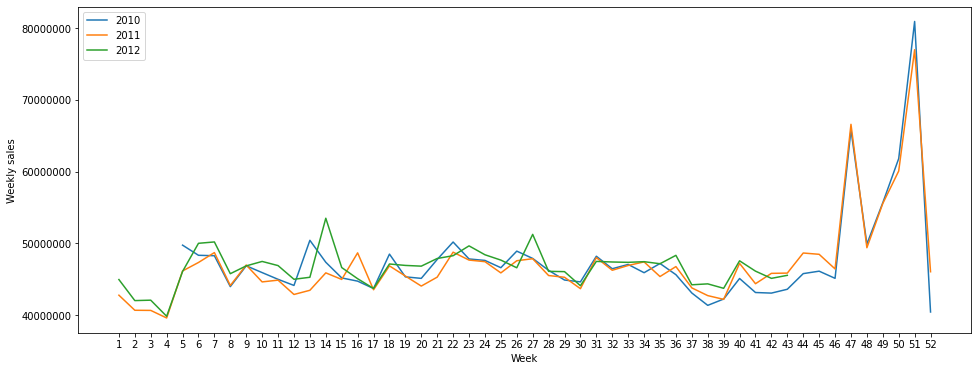

In [20]:
plt.subplots(figsize=(16,6))

sns.lineplot(data=df_2010, x='Week', y='Weekly_Sales')
sns.lineplot(data=df_2011, x='Week', y='Weekly_Sales')
sns.lineplot(data=df_2012, x='Week', y='Weekly_Sales')

plt.ticklabel_format(style='plain')
plt.legend(['2010', '2011', '2012'])
plt.xticks(range(1,53))
plt.xlabel('Week')
plt.ylabel('Weekly sales')

From this graph we can see that every year Weekly Sales are quite similar.

In [21]:
def week_sales_by_year(column):
    sales_df = filtered_df.loc[(filtered_df['Date'] >= '2010-01-01') & (filtered_df['Date'] <= '2010-12-31'),
                              ['Week', 'Weekly_Sales']]
    sales_df = sales_df.groupby('Week').Weekly_Sales.mean().reset_index()
    temp_df = filtered_df.loc[(filtered_df['Date'] >= '2010-01-01') & (filtered_df['Date'] <= '2010-12-31'),
                              ['Week', column]]
    temp_df = temp_df[column].groupby(temp_df['Week']).mean().reset_index()
    sales_temp_2010 = sales_df.merge(temp_df, on='Week')
    fig, ax1 = plt.subplots(figsize=(16,4))

    ax2 = ax1.twinx()
    ax1.plot(sales_temp_2010['Week'], sales_temp_2010['Weekly_Sales'])
    ax2.plot(sales_temp_2010['Week'], sales_temp_2010[column], color='r')

    ax1.ticklabel_format(style='plain')
    plt.xticks(range(1,53))
    ax1.set_yticks(range(14000,29000,1000))

    ax1.set_xlabel('Week')
    ax1.set_ylabel('Weekly sales', color='b')
    ax2.set_ylabel(column, color='r')

    plt.title('2010')

    # ---------------------------------------

    sales_df = filtered_df.loc[(filtered_df['Date'] >= '2011-01-01') & (filtered_df['Date'] <= '2011-12-31'),
                              ['Week', 'Weekly_Sales']]
    sales_df = sales_df.groupby('Week').Weekly_Sales.mean().reset_index()
    temp_df = filtered_df.loc[(filtered_df['Date'] >= '2011-01-01') & (filtered_df['Date'] <= '2011-12-31'),
                              ['Week', column]]
    temp_df = temp_df[column].groupby(temp_df['Week']).mean().reset_index()
    sales_temp_2011 = sales_df.merge(temp_df, on='Week')

    fig, ax3 = plt.subplots(figsize=(16,4))

    ax4 = ax3.twinx()
    ax3.plot(sales_temp_2011['Week'], sales_temp_2011['Weekly_Sales'], color='orange')
    ax4.plot(sales_temp_2011['Week'], sales_temp_2011[column], color='r')

    ax3.ticklabel_format(style='plain')
    plt.xticks(range(1,53))
    ax3.set_yticks(range(14000,29000,1000))

    ax3.set_xlabel('Week')
    ax3.set_ylabel('Weekly sales', color='orange')
    ax4.set_ylabel(column, color='r')

    plt.title('2011')

    # ---------------------------------------

    sales_df = filtered_df.loc[(filtered_df['Date'] >= '2012-01-01') & (filtered_df['Date'] <= '2012-12-31'),
                              ['Week', 'Weekly_Sales']]
    sales_df = sales_df.groupby('Week').Weekly_Sales.mean().reset_index()
    temp_df = filtered_df.loc[(filtered_df['Date'] >= '2012-01-01') & (filtered_df['Date'] <= '2012-12-31'),
                              ['Week', column]]
    temp_df = temp_df[column].groupby(temp_df['Week']).mean().reset_index()
    sales_temp_2012 = sales_df.merge(temp_df, on='Week')

    fig, ax5 = plt.subplots(figsize=(16,4))

    ax6 = ax5.twinx()
    ax5.plot(sales_temp_2012['Week'], sales_temp_2012['Weekly_Sales'], color='g')
    ax6.plot(sales_temp_2012['Week'], sales_temp_2012[column], color='r')

    ax5.ticklabel_format(style='plain')
    plt.xticks(range(1,53))
    ax5.set_yticks(range(14000,29000,1000))

    ax5.set_xlabel('Week')
    ax5.set_ylabel('Weekly sales', color='g')
    ax6.set_ylabel(column, color='r')

    plt.title('2012')

## Temperature

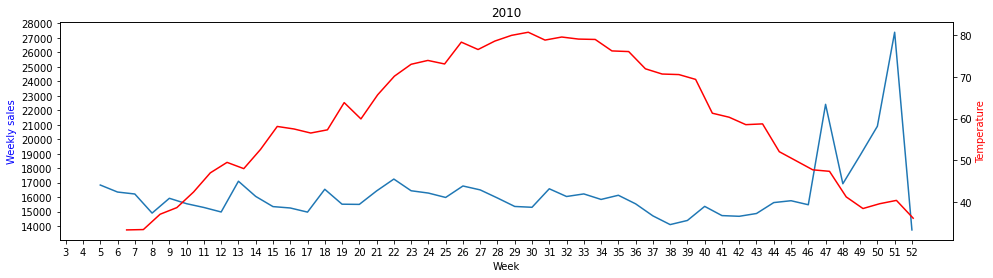

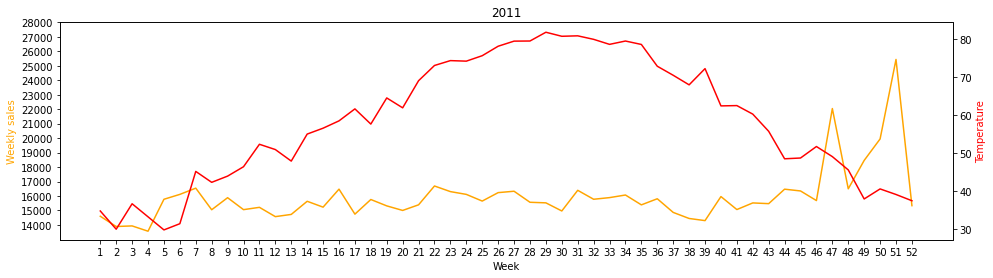

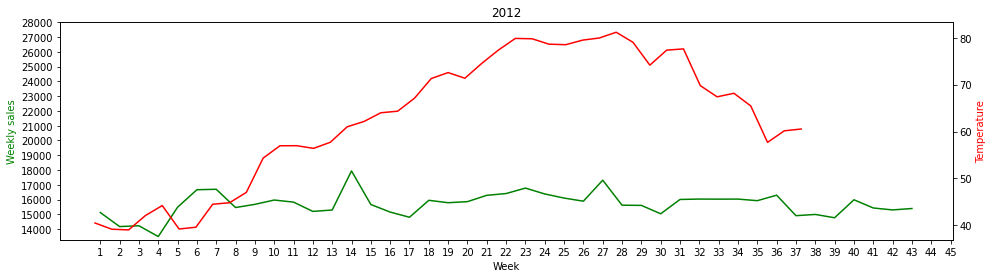

In [22]:
week_sales_by_year('Temperature')

We can see from the yearly graphs above and the correlation matrix that temperature doesn't make any differences for weekly sales. Correlation coeficient between temperature and weekly sales is -0.0023, this means that these two columns are not related. Also yearly graphs shows us that there is no difference when ever temperature is getting higher or lower, because the weekly sales are stable till the 46th week of the year.

## Fuel Price

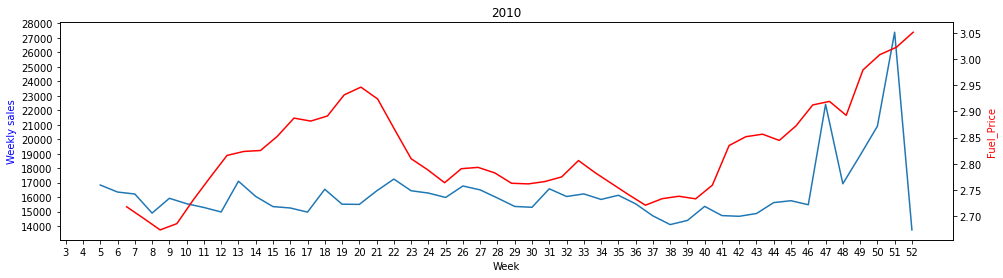

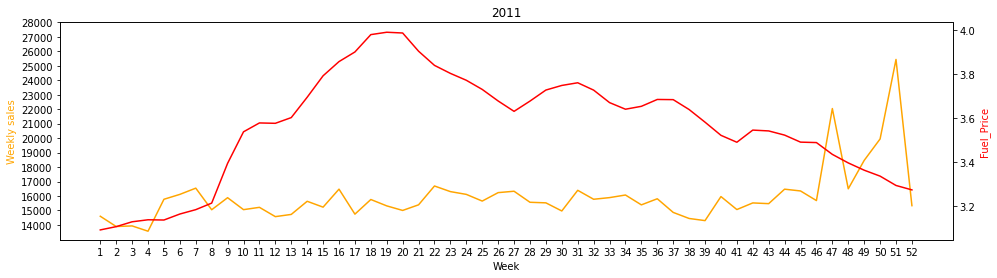

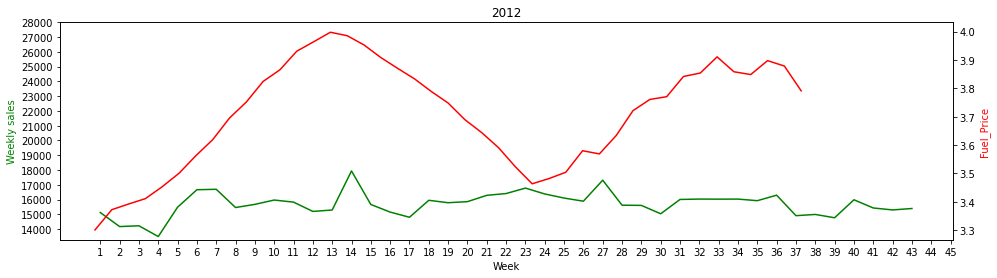

In [23]:
week_sales_by_year('Fuel_Price')

Fuel prices also has no impact for weekly sales to rise or fall. In the 13th week of 2012, fuel prices reached its peak, but the weekly sales began to rise. In the 40th week of 2010, fuel prices started to rise and rose until the end of the year, but from the 46th week weekly sales also started to rise sharply.

## Unemployment

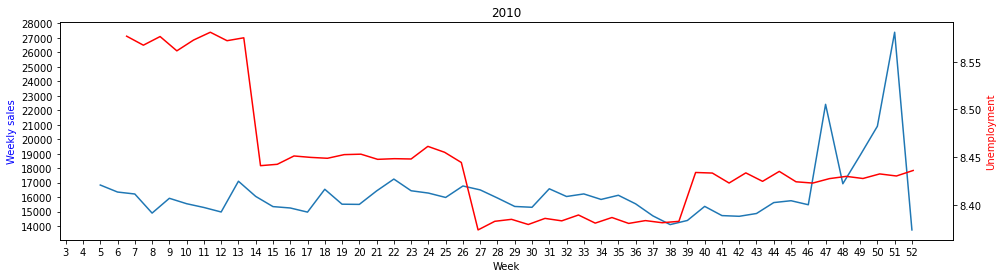

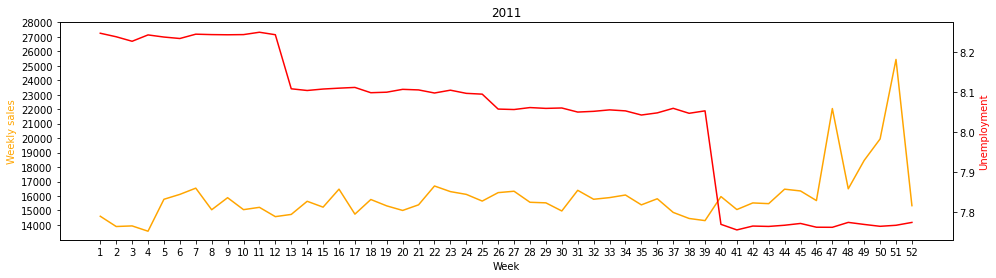

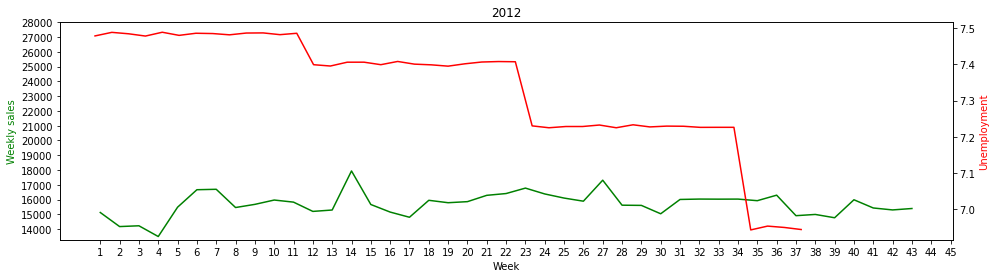

In [24]:
week_sales_by_year('Unemployment')

In 2011, the unemployment rate from the 1st to 12th week was the highest that year, but from the 4th to the 7th week, weekly sales rose sharply. From 35th to 37th week in 2012, the unemployment rate was the lowest, but from 36th to 37 week weekly sales fell. In my opinion unemployment rate also does not affect weekly sales.

## CPI

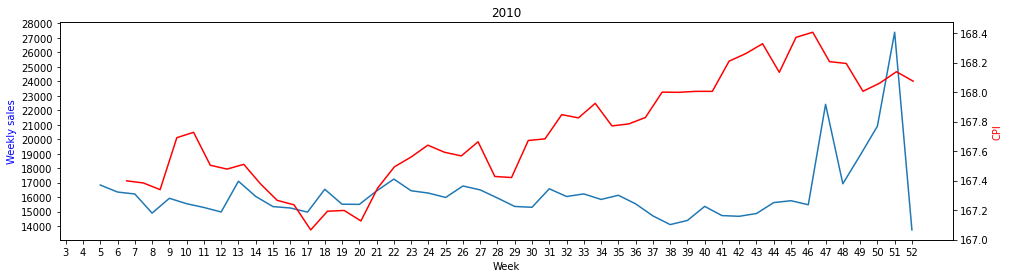

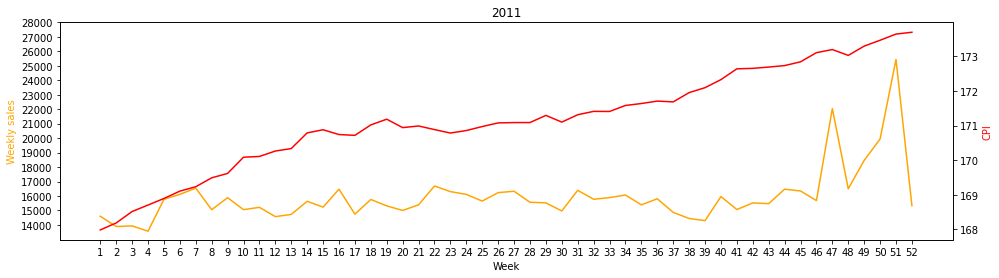

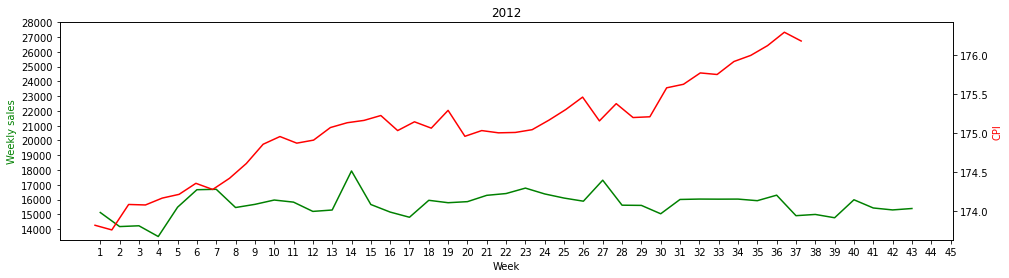

In [25]:
week_sales_by_year('CPI')

In 2011, CPI grew from the start of the year, however weekly sales jumped sharply from the 4th to the 5th week. In the 46th week, CPI reached more than 172 points, weekly sales also started to grow strongly. Because CPI is growing every year and weeklys sales remain similar, so CPI does not have significant impact on weekly sales.

## Markdowns

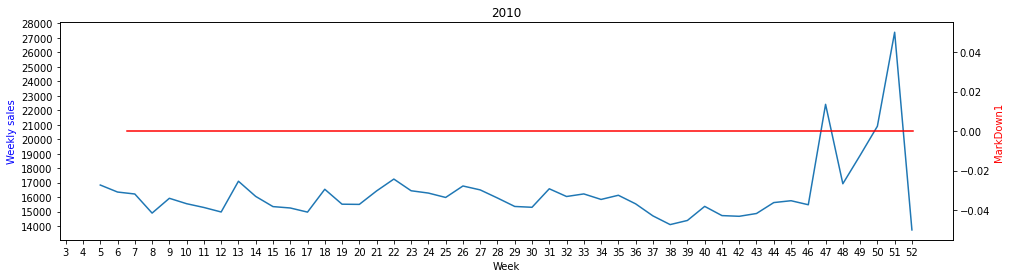

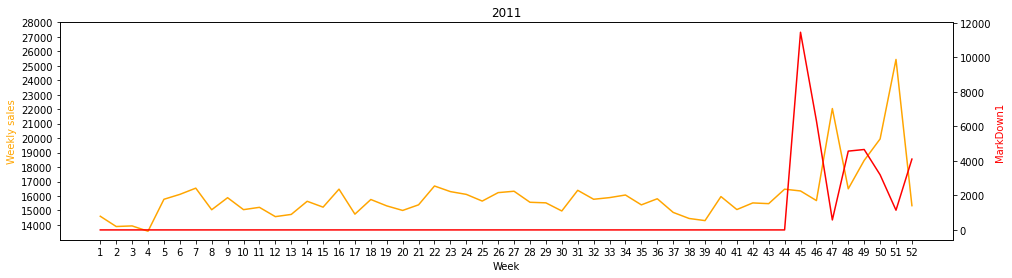

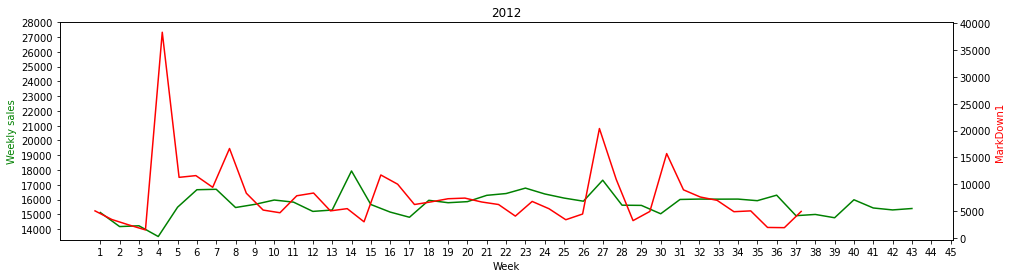

In [26]:
week_sales_by_year('MarkDown1')

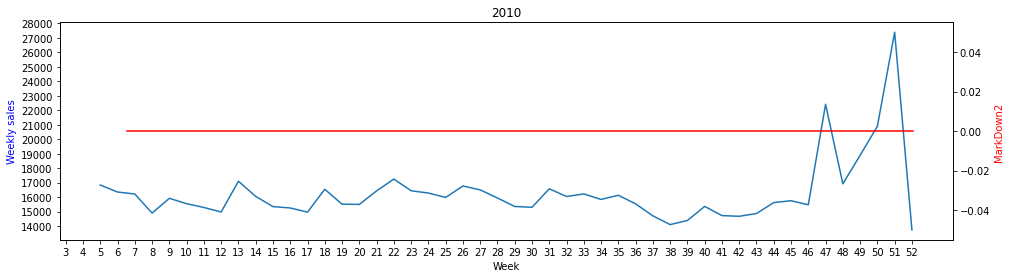

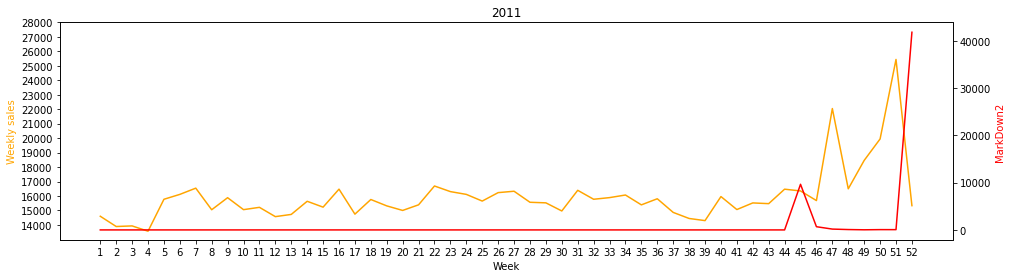

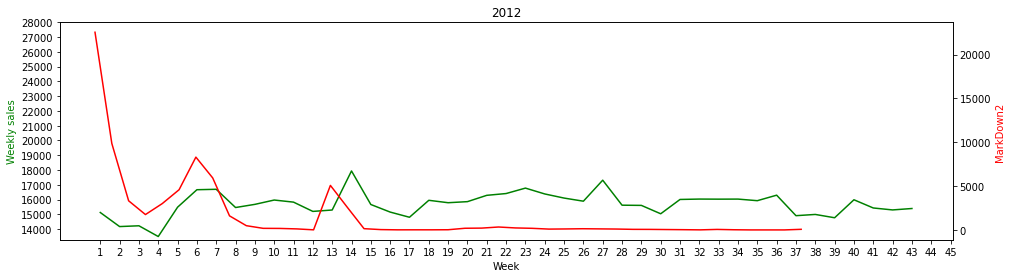

In [27]:
week_sales_by_year('MarkDown2')

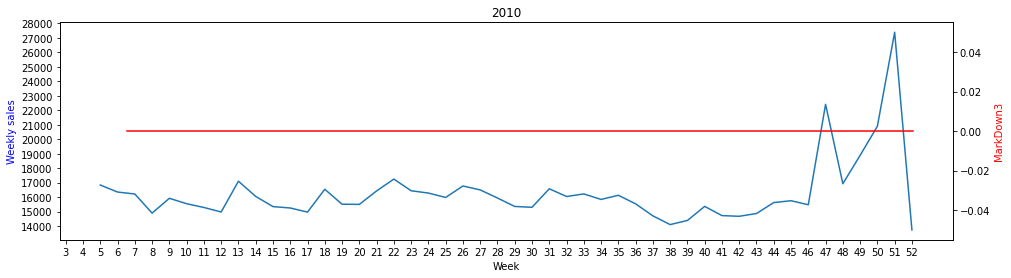

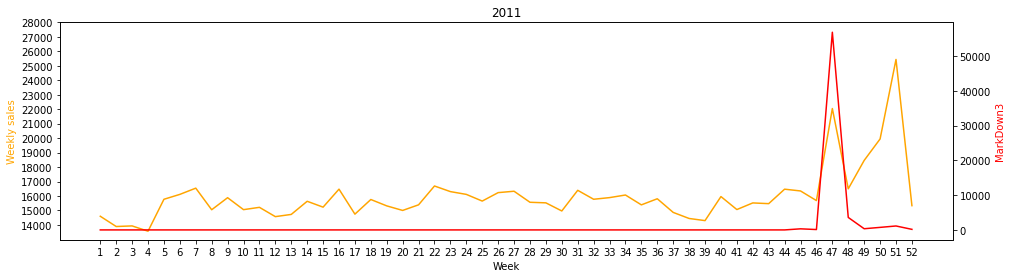

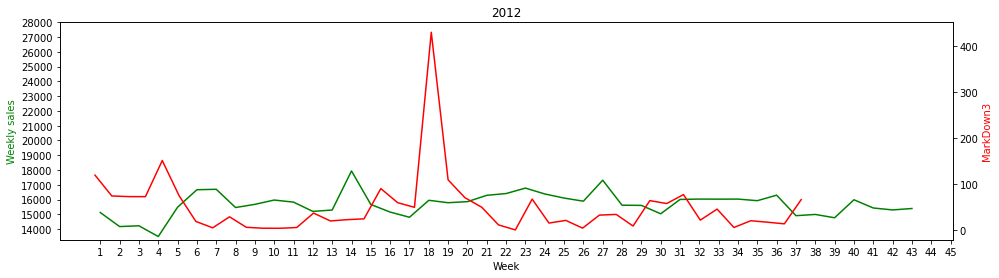

In [28]:
week_sales_by_year('MarkDown3')

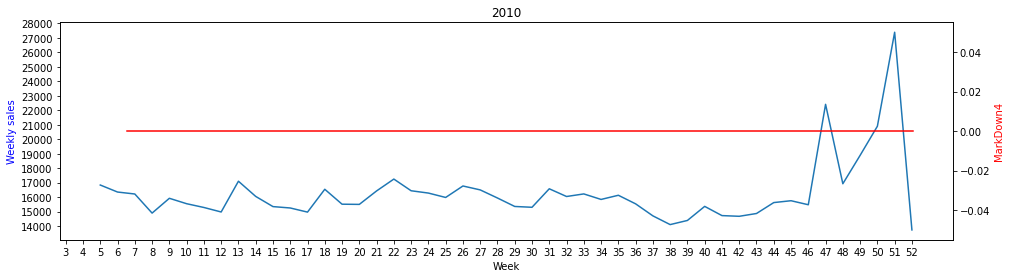

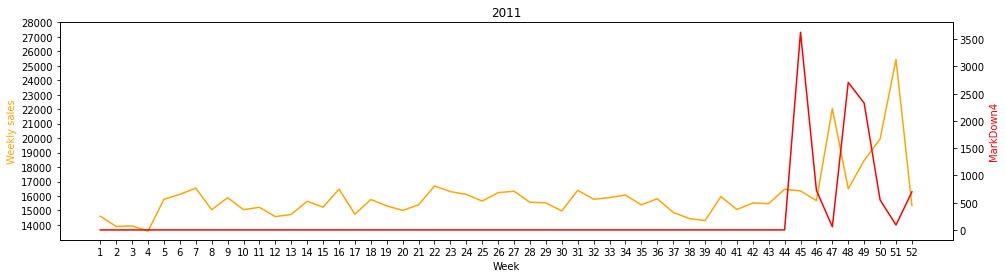

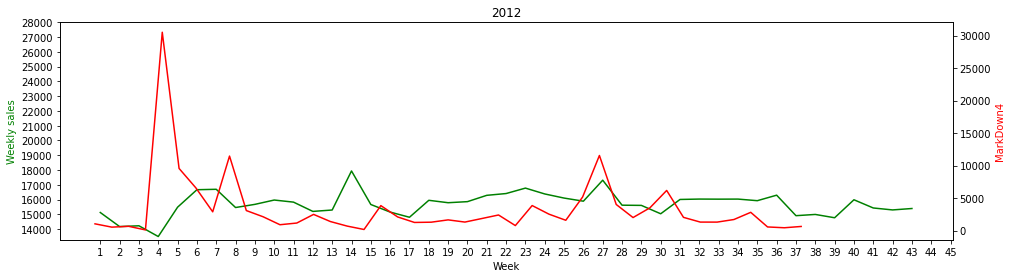

In [29]:
week_sales_by_year('MarkDown4')

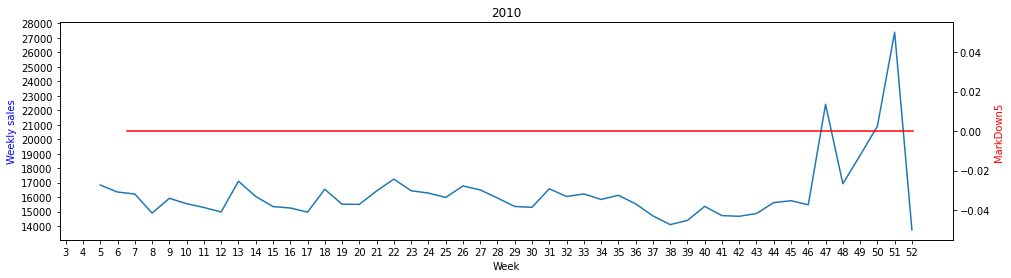

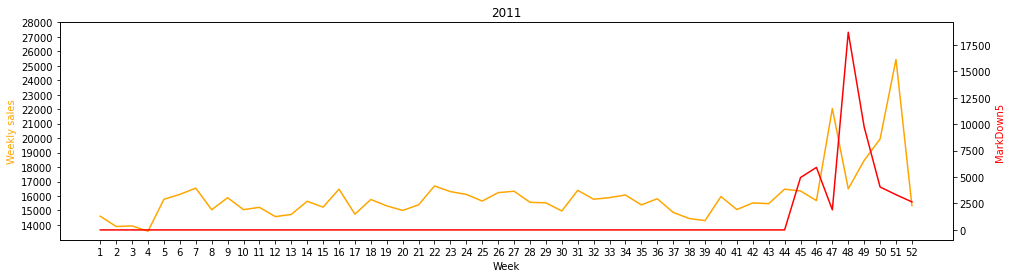

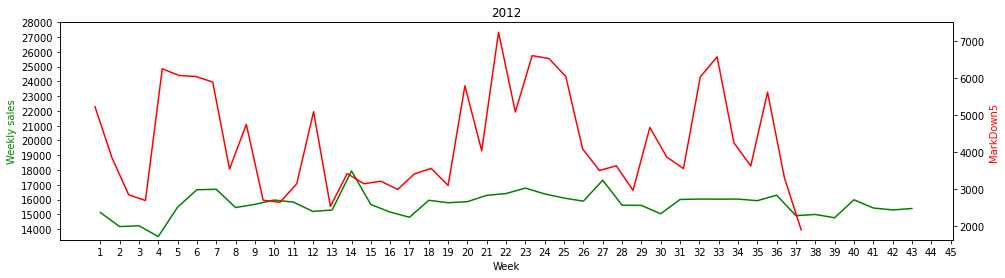

In [30]:
week_sales_by_year('MarkDown5')

Since much of the MarkDown information is missing, there is no point in using MarkDown for training models.

## Holidays

Text(0, 0.5, 'Weekly sales')

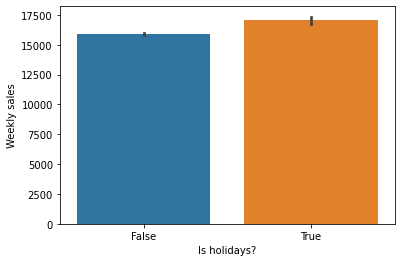

In [31]:
sns.barplot(data=filtered_df, x='IsHoliday', y='Weekly_Sales')

plt.xlabel('Is holidays?')
plt.ylabel('Weekly sales')

<AxesSubplot:xlabel='IsHoliday', ylabel='count'>

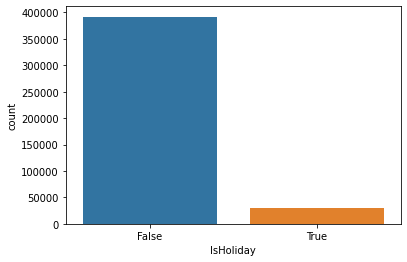

In [374]:
sns.countplot(x='IsHoliday', data=filtered_df)

Although holidays takes only a small part of the year, the average weekly sales during these days are higher than on regular days.

In [32]:
def week_sales_by_group(column):
    plt.subplots(figsize=(30,10))

    dept_sales_df = filtered_df[[column, 'Weekly_Sales']]
    dept_sales_df = dept_sales_df.groupby(column).Weekly_Sales.mean().reset_index()

    sns.barplot(data=dept_sales_df, x=column, y='Weekly_Sales')
    
    plt.xlabel(column)
    plt.ylabel('Weekly sales')

## Departments

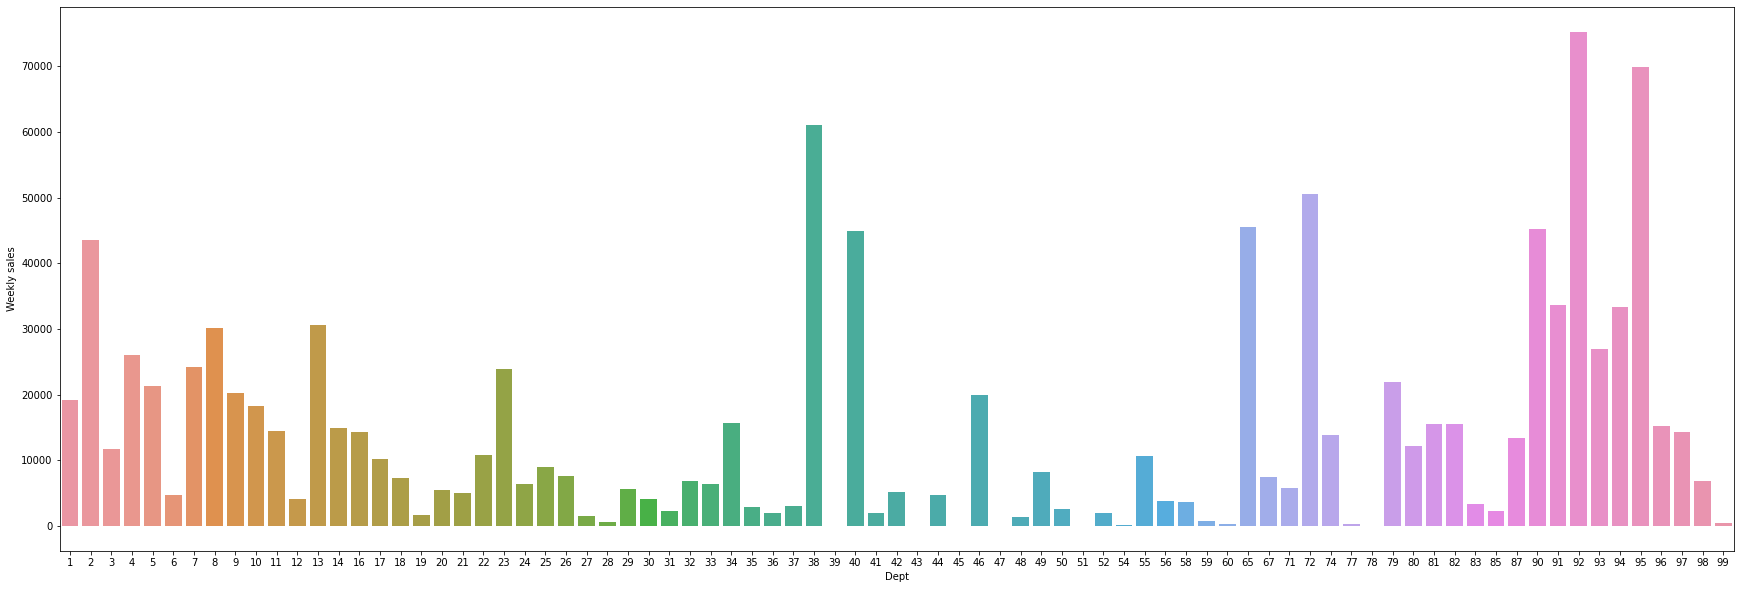

In [33]:
week_sales_by_group('Dept')

From this graph we can see that not all of the departments are the same. Department 92 and 96 makes biggest weakly sales, more than 70 000, while some departments can not reach 10 000 in weekly sales.

## Stores

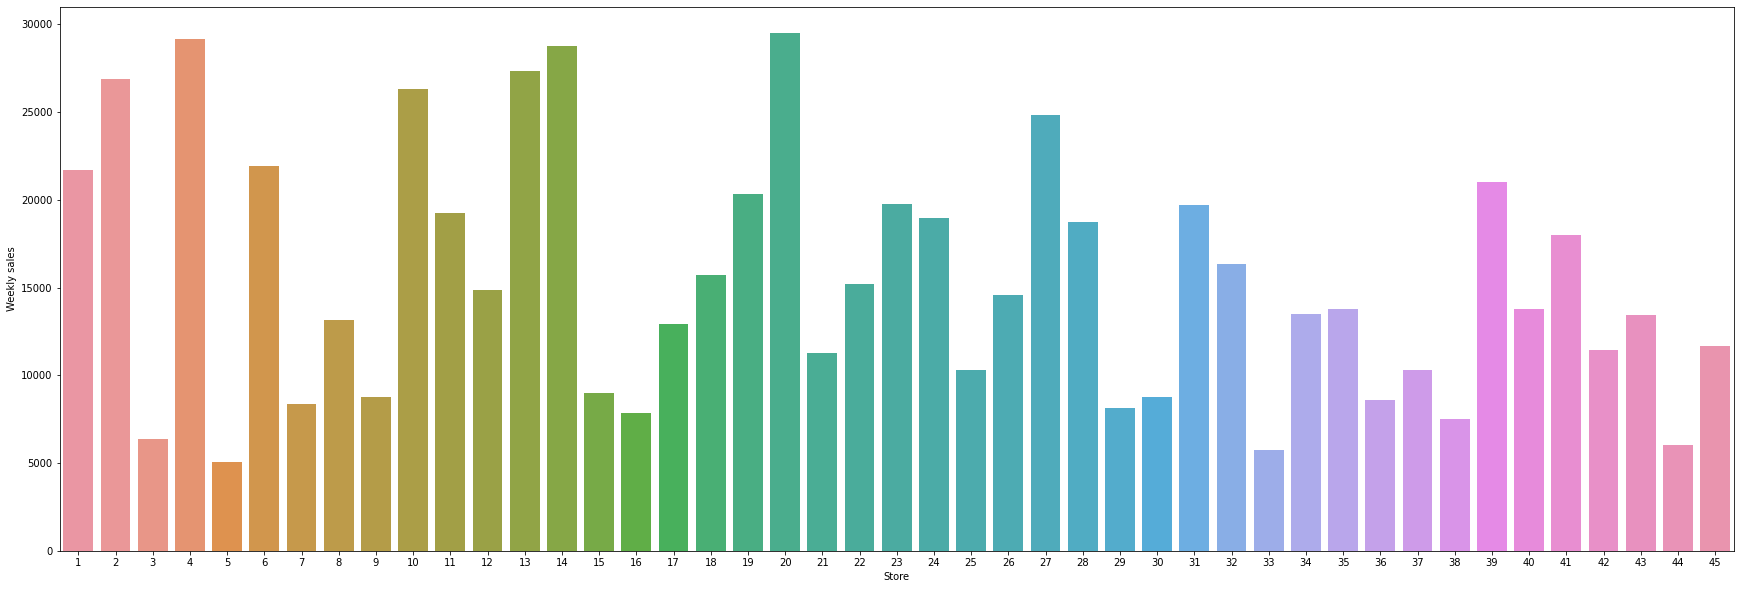

In [34]:
week_sales_by_group('Store')

Weekly sales in different stores are between 5 000 and 30 000. Stores 20, 4 and 14 shows greatest weakly results.

## Type

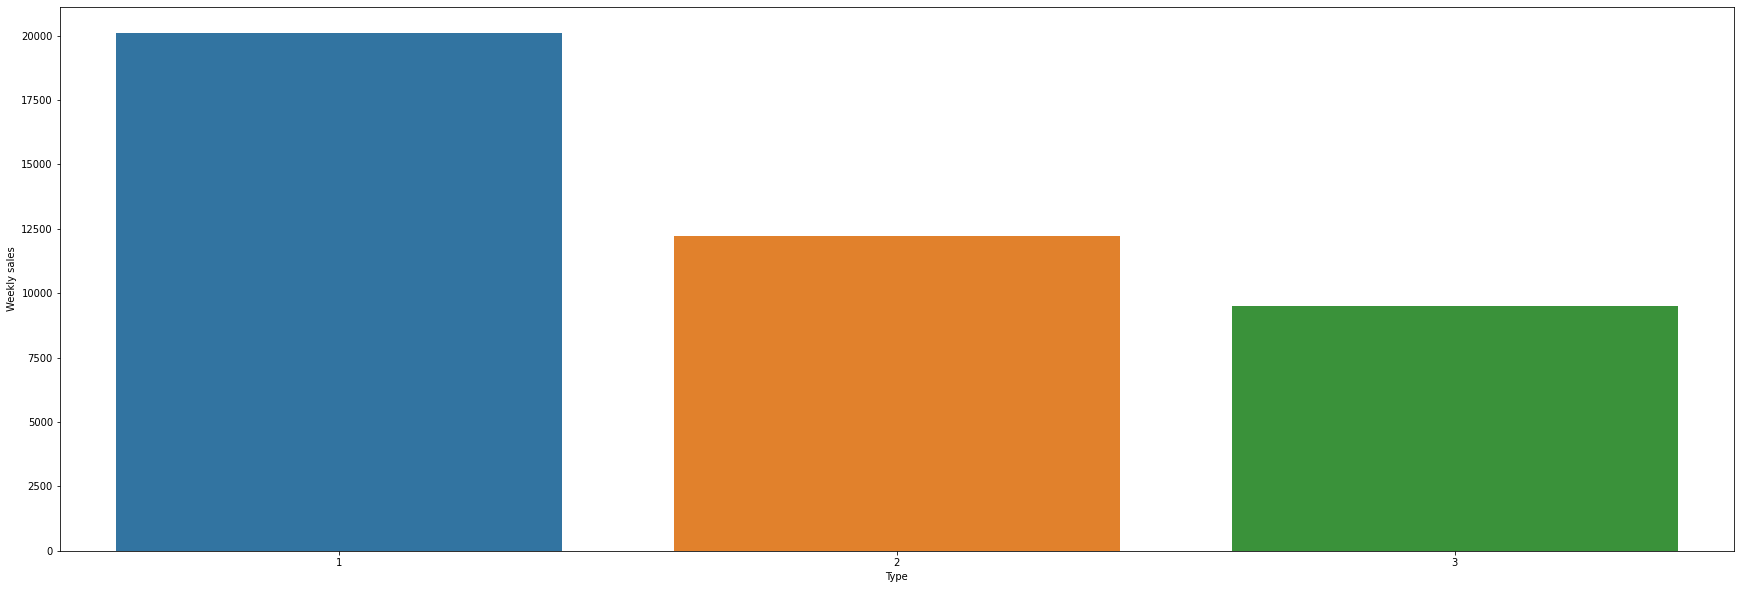

In [35]:
week_sales_by_group('Type')

As we can see in the Type bar plot, Type 1 (A) stores make highest weekly sales, while Type 3 (C) stores make lowest weekly sales.

## Size

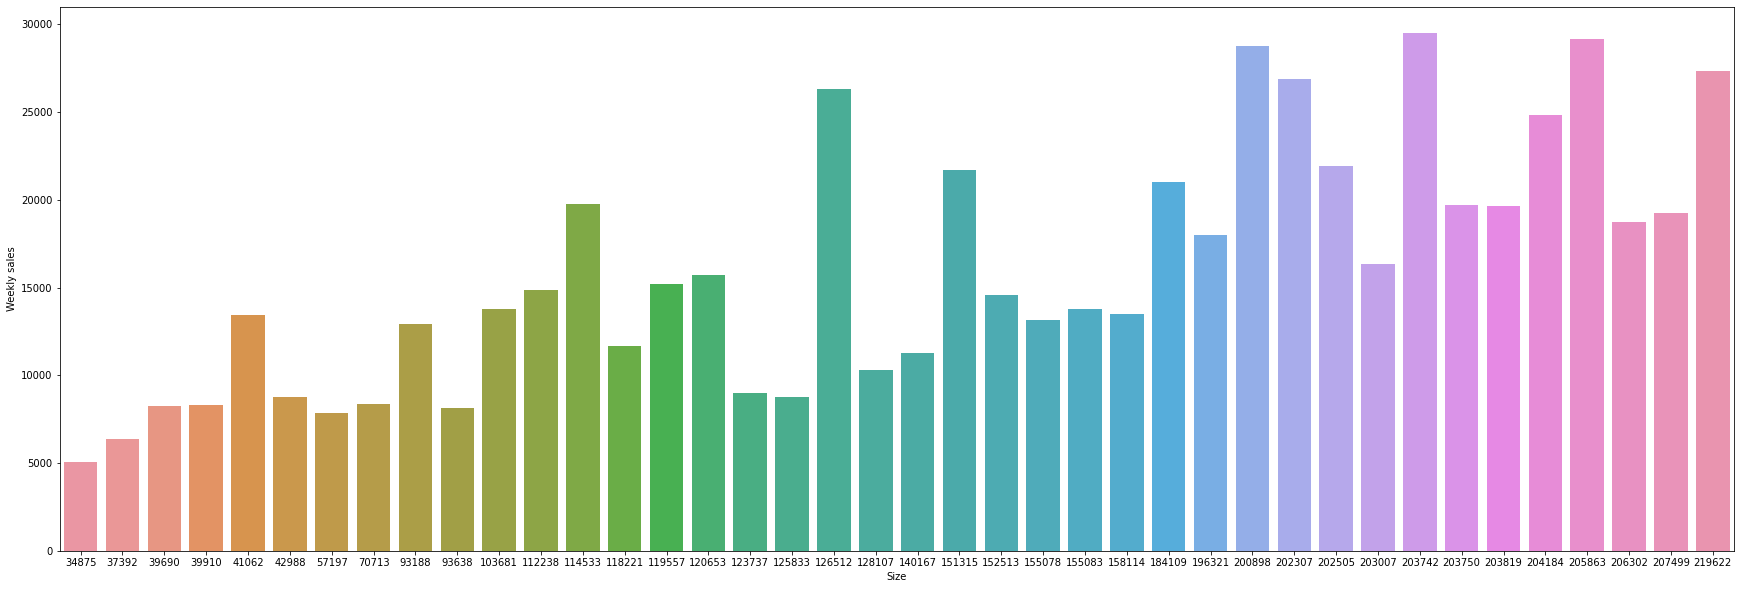

In [36]:
week_sales_by_group('Size')

Store sizes have the biggest impact on weekly sales. As we can see larger stores tend to make higher weekly sales.

### Analyse data, identify key drivers (features) for sales success (mandatory task).

As we could see in the correlation matrix Size, Type and Dept have the biggest impact on Weekly Sales. Size chart showed that the larger stores tend to make higher weekly sales. In the Type chart we could see that Type A stores makes two times more weekly sales than Type C store. Department graph shows that some departments tend to make higher weekly sales than others departments.

As shown in the Temperature, Unemployment, CPI and Fuel Price graphs these features do not affect weekly sales. Correlation matrix also did not show any correlations related to these features.

Holidays feature did not show any correlation between holidays and weekly sales. But looking into Holidays bar charts, we could see that weekly sales made on holidays is higher than on regular days. That means that holidays probably can affect weekly sales positively.

Correlations between Markdowns and Weekly Sales are very weak. Moreover, Markdown charts did not show any positive impact related with weekly sales. Also, more than half of the MarkDowns data is missing from the features dataset. For these reasons Markdown features should not be used for model trainings.

### Prepare suggestions to CFO on how to improve sales for the next year (mandatory task).

1. Based on the store size and weekly sales, customers tend to buy more in stores that can hold larger numbers of items. For this reason larger stores could attract more customers and the weekly sales could increase.
2. Type A stores make largest amount of weekly sales. Therefore, increasing the number of A type stores in different locations could also attract more people.
3. In holiday time customers tend to spend more. As we could see in yearly charts weekly sales on November and December drastically rises. For this reason stores should be advertised more in that time of the year.

# Best hyper parameters search

In [180]:
x = filtered_df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Date', 'Dept',
                      'Weekly_Sales'], axis=1)
y = filtered_df['Weekly_Sales']

In [294]:
dtree = DecisionTreeRegressor()
rf = RandomForestRegressor()
ridge = Ridge()

In [314]:
dtree_param_grid = {'max_depth': range(7, 14, 2),
                    'min_samples_split': range(4, 9, 2),
                    'min_samples_leaf': range(55, 66, 5)}
rf_param_grid = {'n_estimators': range(55, 62, 3),
                 'max_depth': range(20, 26, 5),
                 'min_samples_split': [1.0, 2, 3],
                 'min_samples_leaf': range(1, 6, 2)
                 }
ridge_param_grid = {'alpha': [-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40],
                    'normalize': [True]}

In [74]:
gs_dtree = GridSearchCV(estimator=dtree, param_grid=dtree_param_grid, verbose=2, refit=True, scoring='neg_mean_absolute_error')
gs_dtree.fit(x, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=7, min_samples_leaf=55, min_samples_split=4; total time=   1.1s
[CV] END max_depth=7, min_samples_leaf=55, min_samples_split=4; total time=   1.1s
[CV] END max_depth=7, min_samples_leaf=55, min_samples_split=4; total time=   1.1s
[CV] END max_depth=7, min_samples_leaf=55, min_samples_split=4; total time=   1.1s
[CV] END max_depth=7, min_samples_leaf=55, min_samples_split=4; total time=   1.1s
[CV] END max_depth=7, min_samples_leaf=55, min_samples_split=6; total time=   1.1s
[CV] END max_depth=7, min_samples_leaf=55, min_samples_split=6; total time=   1.1s
[CV] END max_depth=7, min_samples_leaf=55, min_samples_split=6; total time=   1.0s
[CV] END max_depth=7, min_samples_leaf=55, min_samples_split=6; total time=   1.1s
[CV] END max_depth=7, min_samples_leaf=55, min_samples_split=6; total time=   1.1s
[CV] END max_depth=7, min_samples_leaf=55, min_samples_split=8; total time=   1.1s
[CV] END max_depth=7, min

[CV] END max_depth=11, min_samples_leaf=55, min_samples_split=6; total time=   1.3s
[CV] END max_depth=11, min_samples_leaf=55, min_samples_split=6; total time=   1.2s
[CV] END max_depth=11, min_samples_leaf=55, min_samples_split=8; total time=   1.2s
[CV] END max_depth=11, min_samples_leaf=55, min_samples_split=8; total time=   1.3s
[CV] END max_depth=11, min_samples_leaf=55, min_samples_split=8; total time=   1.2s
[CV] END max_depth=11, min_samples_leaf=55, min_samples_split=8; total time=   1.3s
[CV] END max_depth=11, min_samples_leaf=55, min_samples_split=8; total time=   1.2s
[CV] END max_depth=11, min_samples_leaf=60, min_samples_split=4; total time=   1.2s
[CV] END max_depth=11, min_samples_leaf=60, min_samples_split=4; total time=   1.2s
[CV] END max_depth=11, min_samples_leaf=60, min_samples_split=4; total time=   1.2s
[CV] END max_depth=11, min_samples_leaf=60, min_samples_split=4; total time=   1.3s
[CV] END max_depth=11, min_samples_leaf=60, min_samples_split=4; total time=

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(7, 14, 2),
                         'min_samples_leaf': range(55, 66, 5),
                         'min_samples_split': range(4, 9, 2)},
             scoring='neg_mean_absolute_error', verbose=2)

In [75]:
print(gs_dtree.best_score_)
print(gs_dtree.best_params_)
print(gs_dtree.best_estimator_)

-14641.06300249261
{'max_depth': 7, 'min_samples_leaf': 55, 'min_samples_split': 4}
DecisionTreeRegressor(max_depth=7, min_samples_leaf=55, min_samples_split=4)


In [315]:
gs_rf = GridSearchCV(estimator=rf, param_grid=rf_param_grid, verbose=2, cv=2,refit=True, scoring='neg_mean_absolute_error')
gs_rf.fit(x, y)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1.0, n_estimators=55; total time=   2.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1.0, n_estimators=55; total time=   2.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1.0, n_estimators=58; total time=   2.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1.0, n_estimators=58; total time=   2.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1.0, n_estimators=61; total time=   2.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1.0, n_estimators=61; total time=   2.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=55; total time= 1.0min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=55; total time= 1.0min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=58; total time= 1.1min
[CV] END max_depth=20, min

[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=58; total time= 1.1min
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=61; total time= 1.1min
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=61; total time= 1.1min
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=3, n_estimators=55; total time= 1.0min
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=3, n_estimators=55; total time= 1.0min
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=3, n_estimators=58; total time= 1.1min
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=3, n_estimators=58; total time= 1.1min
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=3, n_estimators=61; total time= 1.2min
[CV] END max_depth=25, min_samples_leaf=3, min_samples_split=3, n_estimators=61; total time= 1.2min
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=1.0, n_estimators=55; total time=   2.1

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(20, 26, 5),
                         'min_samples_leaf': range(1, 6, 2),
                         'min_samples_split': [1.0, 2, 3],
                         'n_estimators': range(55, 62, 3)},
             scoring='neg_mean_absolute_error', verbose=2)

In [316]:
print(gs_rf.best_score_)
print(gs_rf.best_params_)
print(gs_rf.best_estimator_)

-14527.91588509371
{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 55}
RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=55)


In [297]:
gs_ridge = GridSearchCV(estimator=ridge, param_grid=ridge_param_grid, verbose=2, refit=True, scoring='neg_mean_absolute_error')
gs_ridge.fit(x, y)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] END ...........................alpha=-3, normalize=True; total time=   1.2s
[CV] END ...........................alpha=-3, normalize=True; total time=   1.2s
[CV] END ...........................alpha=-3, normalize=True; total time=   1.1s
[CV] END ...........................alpha=-3, normalize=True; total time=   1.2s
[CV] END ...........................alpha=-3, normalize=True; total time=   1.1s
[CV] END ...........................alpha=-2, normalize=True; total time=   1.1s
[CV] END ...........................alpha=-2, normalize=True; total time=   1.1s
[CV] END ...........................alpha=-2, normalize=True; total time=   1.1s
[CV] END ...........................alpha=-2, normalize=True; total time=   1.3s
[CV] END ...........................alpha=-2, normalize=True; total time=   1.2s
[CV] END ...........................alpha=-1, normalize=True; total time=   1.2s
[CV] END ...........................alpha=-1, n

[CV] END ...........................alpha=40, normalize=True; total time=   0.9s
[CV] END ...........................alpha=40, normalize=True; total time=   0.9s
[CV] END ...........................alpha=40, normalize=True; total time=   0.9s
[CV] END ...........................alpha=40, normalize=True; total time=   0.9s


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [-3, -2, -1, 1e-15, 1e-10, 1e-08, 1e-05,
                                   0.0001, 0.001, 0.01, 0.5, 1, 1.5, 2, 3, 4, 5,
                                   10, 20, 30, 40],
                         'normalize': [True]},
             scoring='neg_mean_absolute_error', verbose=2)

In [298]:
print(gs_ridge.best_score_)
print(gs_ridge.best_params_)
print(gs_ridge.best_estimator_)

-14591.826891432129
{'alpha': 1e-15, 'normalize': True}
Ridge(alpha=1e-15, normalize=True)


# Training phase

In [317]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [318]:
model = RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=55)

In [319]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=55)

In [320]:
predictions = model.predict(x_test)

In [321]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 14382.586865800513


In [322]:
true_values = pd.DataFrame(y_test.values, columns=['Weekly sales test'])
true_values

,Weekly sales test
0,7270.38
1,17379.03
2,9929.44
3,18810.73
4,64779.19
...,...
84309,4335.23
84310,61019.71
84311,18243.62
84312,10130.12


In [323]:
pred_values = pd.DataFrame(predictions, columns=['Weekly sales'])
pred_values

,Weekly sales
0,26577.413752
1,8649.028669
2,5160.563436
3,15773.086728
4,14444.611324
...,...
84309,20881.042652
84310,12415.369228
84311,14938.249407
84312,18707.413780


In [324]:
x_test['Weekly Sales predicted'] = pred_values.values
x_test['Weekly Sales'] = true_values.values
x_test

<ipython-input-324-05f84b1ab5db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Weekly Sales predicted'] = pred_values.values
<ipython-input-324-05f84b1ab5db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Weekly Sales'] = true_values.values


,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Week,Weekly Sales predicted,Weekly Sales
194776,20,39.93,3.617,213.023622,6.961,False,1,203742,5,26577.413752,7270.38
246018,25,72.08,3.654,214.743351,7.280,False,2,128107,31,8649.028669,17379.03
316981,33,78.24,4.202,129.089000,8.687,False,1,39690,19,5160.563436,9929.44
107602,11,77.67,3.666,226.518093,6.334,False,1,207499,39,15773.086728,18810.73
172471,18,73.12,3.784,135.628333,8.890,False,2,120653,27,14444.611324,64779.19
...,...,...,...,...,...,...,...,...,...,...,...
19510,2,86.37,3.407,221.578546,6.565,False,1,202307,30,20881.042652,4335.23
325586,34,74.64,3.683,129.049032,10.581,False,1,158114,22,12415.369228,61019.71
247578,26,50.13,2.849,131.940807,8.512,False,1,152513,14,14938.249407,18243.62
301461,31,57.16,3.669,220.697433,7.057,False,1,203750,10,18707.413780,10130.12


Text(0, 0.5, 'Weekly sales')

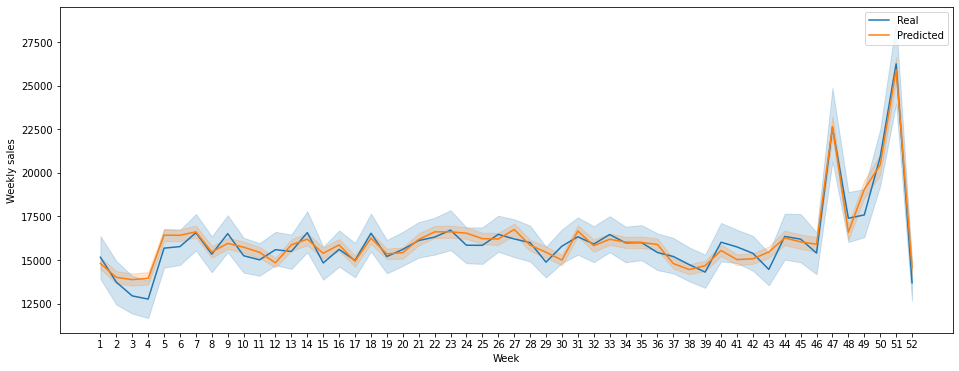

In [371]:
plt.subplots(figsize=(16,6))

sns.lineplot(data=x_test, x='Week', y='Weekly Sales')
sns.lineplot(data=x_test, x='Week', y='Weekly Sales predicted')

plt.ticklabel_format(style='plain')
plt.xticks(range(1,53))
plt.legend(['Real', 'Predicted'])
plt.xlabel('Week')
plt.ylabel('Weekly sales')

# 2013 year prediction phase

In [358]:
df_2013 = features.loc[(features['Date'] >= '2012-12-10')]
df_2013

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
149,1,2012-12-14,48.89,3.168,3504.83,NaN,73.26,1636.80,2779.60,223.719277,6.573,False
150,1,2012-12-21,56.02,3.098,8231.71,NaN,274.00,358.15,2834.02,223.839845,6.573,False
151,1,2012-12-28,44.79,3.108,12659.55,37101.13,174.78,74.46,1208.86,223.960414,6.573,True
152,1,2013-01-04,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False
153,1,2013-01-11,50.32,3.243,6520.24,16134.60,12.17,774.55,4001.25,224.201552,6.525,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [359]:
test_data = df_2013.merge(stores, on='Store')
test_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2012-12-14,48.89,3.168,3504.83,NaN,73.26,1636.80,2779.60,223.719277,6.573,False,A,151315
1,1,2012-12-21,56.02,3.098,8231.71,NaN,274.00,358.15,2834.02,223.839845,6.573,False,A,151315
2,1,2012-12-28,44.79,3.108,12659.55,37101.13,174.78,74.46,1208.86,223.960414,6.573,True,A,151315
3,1,2013-01-04,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,A,151315
4,1,2013-01-11,50.32,3.243,6520.24,16134.60,12.17,774.55,4001.25,224.201552,6.525,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
1481,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
1482,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
1483,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [360]:
test_data['Week'] = test_data['Date'].dt.isocalendar().week
test_data['Week'] = test_data['Week'].astype('int64')
test_data['Week'].head()

0    50
1    51
2    52
3     1
4     2
Name: Week, dtype: int64

In [361]:
test_data['Type'] = test_data['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))
test_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Week
0,1,2012-12-14,48.89,3.168,3504.83,NaN,73.26,1636.80,2779.60,223.719277,6.573,False,1,151315,50
1,1,2012-12-21,56.02,3.098,8231.71,NaN,274.00,358.15,2834.02,223.839845,6.573,False,1,151315,51
2,1,2012-12-28,44.79,3.108,12659.55,37101.13,174.78,74.46,1208.86,223.960414,6.573,True,1,151315,52
3,1,2013-01-04,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,1,151315,1
4,1,2013-01-11,50.32,3.243,6520.24,16134.60,12.17,774.55,4001.25,224.201552,6.525,False,1,151315,2


In [362]:
test = test_data.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Date'], axis=1)
test

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Week
0,1,48.89,3.168,223.719277,6.573,False,1,151315,50
1,1,56.02,3.098,223.839845,6.573,False,1,151315,51
2,1,44.79,3.108,223.960414,6.573,True,1,151315,52
3,1,41.73,3.161,224.080983,6.525,False,1,151315,1
4,1,50.32,3.243,224.201552,6.525,False,1,151315,2
...,...,...,...,...,...,...,...,...,...
1480,45,76.05,3.639,NaN,NaN,False,2,118221,26
1481,45,77.50,3.614,NaN,NaN,False,2,118221,27
1482,45,79.37,3.614,NaN,NaN,False,2,118221,28
1483,45,82.84,3.737,NaN,NaN,False,2,118221,29


In [363]:
test.isnull().sum()

Store             0
Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
IsHoliday         0
Type              0
Size              0
Week              0
dtype: int64

In [364]:
test['CPI'].fillna(test['CPI'].mean(axis=0, skipna=True), inplace=True)
test['Unemployment'].fillna(test['Unemployment'].mean(axis=0, skipna=True), inplace=True)
test.isnull().sum()

Store           0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
Week            0
dtype: int64

In [365]:
predictions_2013 = model.predict(test)

In [366]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 14382.586865800513


In [367]:
pred_2013_values = pd.DataFrame(predictions_2013, columns=['Weekly sales'])
pred_2013_values

,Weekly sales
0,22989.993135
1,29199.968972
2,20434.266917
3,18317.393156
4,16716.128293
...,...
1480,11913.022548
1481,12140.602560
1482,11664.482757
1483,11840.316815


In [368]:
test['Weekly Sales predicted'] = pred_2013_values.values
test

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Week,Weekly Sales predicted
0,1,48.89,3.168,223.719277,6.573000,False,1,151315,50,22989.993135
1,1,56.02,3.098,223.839845,6.573000,False,1,151315,51,29199.968972
2,1,44.79,3.108,223.960414,6.573000,True,1,151315,52,20434.266917
3,1,41.73,3.161,224.080983,6.525000,False,1,151315,1,18317.393156
4,1,50.32,3.243,224.201552,6.525000,False,1,151315,2,16716.128293
...,...,...,...,...,...,...,...,...,...,...
1480,45,76.05,3.639,177.503201,6.856594,False,2,118221,26,11913.022548
1481,45,77.50,3.614,177.503201,6.856594,False,2,118221,27,12140.602560
1482,45,79.37,3.614,177.503201,6.856594,False,2,118221,28,11664.482757
1483,45,82.84,3.737,177.503201,6.856594,False,2,118221,29,11840.316815


Text(0.5, 1.0, '2013')

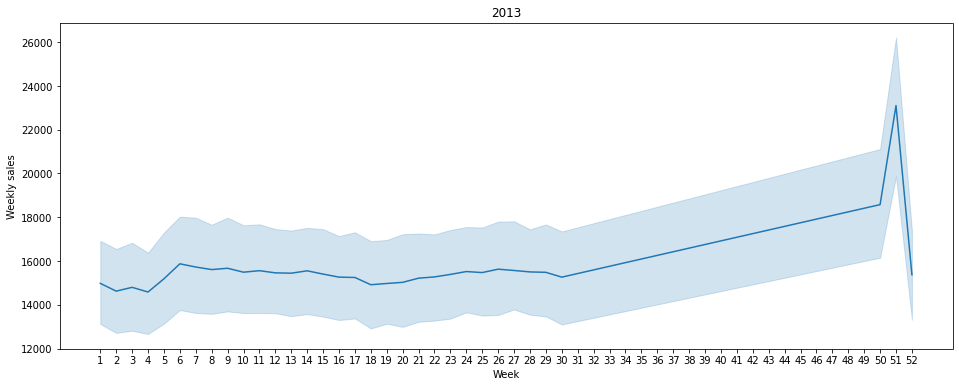

In [370]:
plt.subplots(figsize=(16,6))

sns.lineplot(data=test, x='Week', y='Weekly Sales predicted')

plt.ticklabel_format(style='plain')
plt.xticks(range(1,53))
plt.xlabel('Week')
plt.ylabel('Weekly sales')

plt.title('2013')